<a href="https://colab.research.google.com/github/sanskritilakhmani/Tensorflow/blob/master/Tf2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Tensorflow
!pip install -q tensorflow==2.0.0-betl
import tensorflow as tf
print(tf.__version__)

In [ ]:
# Others imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

In [ ]:
# Load in the data
data = pd.read_csv('moore.csv',header=None).values
X = data[ : , 0].reshape(-1,1) # make it a 2-d array o size N * D where D = 1
Y = data[ :, 1]

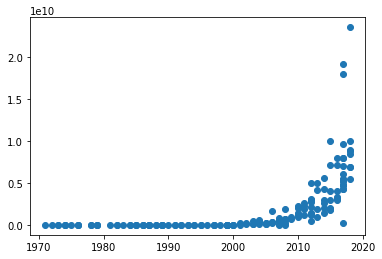

In [ ]:
# Plot the data - it is exponential
plt.scatter(X,Y)

In [ ]:
# Let's also center the X data so that the values are not too large
# we could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()

In [ ]:
# Now create our tensorflow mopdel
model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(1,)),
      tf.keras.layers.Dense(1)
])
model = compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.complile(optimizer='adam', loss='mse')

# learning rate scheduler
def schedule(epoch, lr) :
  if epoch >= 50 :
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# train the model
r = model.fit(X,Y,epochs=200, callbacks=[scheduler])

In [ ]:
# Plot the loss 
plt.plot(r.history[ 'loss' ], label='loss')